In [30]:
from warnings import filterwarnings
filterwarnings("ignore")

In [31]:
#Gerekli Kütüphaneleri import ettim
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [32]:
data=pd.read_csv("full_data.csv")#Veri kümesini hazırladım
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [33]:
print(data.shape)#Datamızın sütün ve satır sayılarını ekrana yazdırdım

(4981, 11)


In [34]:
#Belirlenen sütunların benzersiz değerlerini inceledim
cap=["gender","ever_married","work_type","Residence_type","smoking_status"]
for i in cap:
    print(i,":",data[i].unique())
    print("-"*100)

gender : ['Male' 'Female']
----------------------------------------------------------------------------------------------------
ever_married : ['Yes' 'No']
----------------------------------------------------------------------------------------------------
work_type : ['Private' 'Self-employed' 'Govt_job' 'children']
----------------------------------------------------------------------------------------------------
Residence_type : ['Urban' 'Rural']
----------------------------------------------------------------------------------------------------
smoking_status : ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
----------------------------------------------------------------------------------------------------


In [35]:
data.isnull().sum()#Data'da boş değer olup olmadığını inceledim  

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [36]:
#Label Encoder İşlemi Yaptım:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le_deger=["gender","ever_married","Residence_type"]
for i in le_deger:
    data[i]=le.fit_transform(data[i])
    
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
2,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
3,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
4,1,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked,1


In [37]:
#One Hot Encoder İşlemi Yaptım:
dumy_cap=["work_type","smoking_status"]
for i in dumy_cap:
    data=pd.concat([data,pd.get_dummies(data[i])],axis=1)
    data.drop(i,axis=1,inplace=True)
data.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Govt_job,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,0,1,0,0
1,1,80.0,0,1,1,0,105.92,32.5,1,0,1,0,0,0,0,1,0
2,0,49.0,0,0,1,1,171.23,34.4,1,0,1,0,0,0,0,0,1
3,0,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0,0,0,1,0
4,1,81.0,0,0,1,1,186.21,29.0,1,0,1,0,0,0,1,0,0


In [38]:
x=data.drop("heart_disease",axis=1)#Bağımsız Değişken
y=data[["heart_disease"]]#Bağımlı Değişken

In [39]:
#Değişkenlerin p-values değerlerini imceledim
import statsmodels.api as sm
model=sm.OLS(y,x).fit().summary()
model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          heart_disease   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     42.26
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          2.03e-110
Time:                        21:41:44   Log-Likelihood:                 568.06
No. Observations:                4981   AIC:                            -1106.
Df Residuals:                    4966   BIC:                            -1008.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
gender                0.0356      0.006      5.661      0.000       0.023       0.048
age                   0.0035      0.000     15.379      0.000       0.003       0.004
hypertension          0.0152      0.011      1.381      0.167      -0.006       0.037
ever_married         -0.0435      0.009     -4.797      0.000      -0.061      -0.026
Residence_type       -0.0019      0.006     -0.316      0.752      -0.014       0.010
avg_glucose_level     0.0005   7.15e-05      6.787      0.000       0.000       0.001
bmi                  -0.0007      0.001     -1.336      0.182      -0.002       0.000
stroke                0.0529      0.015      3.597      0.000       0.024       0.082
Govt_job             -0.0764      0.013     -5.994      0.000      -0.101      -0.051
Private              -0.0638      0.010     -6.120      0.000      -0.084      -0.043
Self-employed        -0.0668      0.013     -5.160      0.000      -0.092      -0.041
children             -0.0124      0.011     -1.158      0.247      -0.033       0.009
Unknown              -0.0593      0.010     -6.087      0.000      -0.078      -0.040
formerly smoked      -0.0566      0.011     -4.971      0.000      -0.079      -0.034
never smoked         -0.0671      0.010     -6.990      0.000      -0.086      -0.048
smokes               -0.0364      0.011     -3.278      0.001      -0.058      -0.015
==============================================================================
Omnibus:                     3328.363   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31318.734
Skew:                           3.251   Prob(JB):                         0.00
Kurtosis:                      13.422   Cond. No.                     9.05e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.64e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [40]:
#p-value değerleri fazla olanları data'dan kaldırdım
drop_cap=["Residence_type","children"]
for i in drop_cap:
    data.drop(i,axis=1,inplace=True)
    
x=data.drop("heart_disease",axis=1)#Bağımsız Değişken
y=data[["heart_disease"]]#Bağımlı Değişken

#Değişkenlerin p-values değerlerini imceledim
import statsmodels.api as sm
model=sm.OLS(y,x).fit().summary()
model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          heart_disease   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     45.51
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          3.09e-111
Time:                        21:41:44   Log-Likelihood:                 568.01
No. Observations:                4981   AIC:                            -1108.
Df Residuals:                    4967   BIC:                            -1017.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
gender                0.0356      0.006      5.664      0.000       0.023       0.048
age                   0.0035      0.000     15.378      0.000       0.003       0.004
hypertension          0.0152      0.011      1.385      0.166      -0.006       0.037
ever_married         -0.0435      0.009     -4.796      0.000      -0.061      -0.026
avg_glucose_level     0.0005   7.15e-05      6.789      0.000       0.000       0.001
bmi                  -0.0007      0.001     -1.340      0.180      -0.002       0.000
stroke                0.0528      0.015      3.594      0.000       0.024       0.082
Govt_job             -0.0640      0.016     -3.960      0.000      -0.096      -0.032
Private              -0.0514      0.014     -3.775      0.000      -0.078      -0.025
Self-employed        -0.0544      0.016     -3.305      0.001      -0.087      -0.022
Unknown              -0.0726      0.015     -4.928      0.000      -0.101      -0.044
formerly smoked      -0.0699      0.018     -3.868      0.000      -0.105      -0.034
never smoked         -0.0804      0.017     -4.801      0.000      -0.113      -0.048
smokes               -0.0498      0.018     -2.754      0.006      -0.085      -0.014
==============================================================================
Omnibus:                     3328.381   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31319.210
Skew:                           3.251   Prob(JB):                         0.00
Kurtosis:                      13.423   Cond. No.                     1.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
#test ve eğitim kümelerinin hazırlanması
from sklearn.model_selection import train_test_split,GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [42]:
#En optimum değerleri bulmak(işlemin kısa sürmesini istediğim için değer aralıklarını küçük değerler verdim)
def GradientBoostingAlgoritma():
    from sklearn.ensemble import GradientBoostingClassifier
    ac=GradientBoostingClassifier(random_state=42,learning_rate=0.1)
    ac_params={"n_estimators":np.arange(1,5,1),"min_samples_split":np.arange(1,5,1),"min_samples_leaf":np.arange(1,5,1)}
    gsv=GridSearchCV(ac,ac_params,cv=10,n_jobs=-1).fit(x_train,y_train.values.ravel())
    return gsv.best_params_
    
GradientBoostingAlgoritma()

{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1}

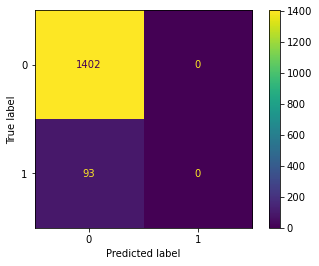

In [43]:
#Algoritmanın oluşturulması ve tahmin sonuçları
ac=GradientBoostingClassifier(learning_rate=0.1,
                             random_state=42,
                             n_estimators=1,
                             min_samples_leaf=1,
                             min_samples_split=2
                             ).fit(x_train,y_train.values.ravel())
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=ConfusionMatrixDisplay(confusion_matrix(y_test,ac.predict(x_test)))
cm.plot()